# Mixed Layer Depths in Terra Nova Bay

**Aim:** To look at the properties of seawater in this region, and use that to determine the mixed layer depths in Terra Nova Bay.

Terra Nova Bay is an area of interest, because of its lack of ice cover in the area (i.e. polynya), exposing relatively warm ocean surface waters to the cold atmosphere. The cold continental air creates sea ice in the bay, however, the polynya is maintained, since strong winds drive the ice seawards as it forms, maintaining the ocean surface's exposure to the cold air. This contrast enhances air-sea fluxes.

The formation of ice in this region results in the densest waters in the global ocean. The freezing-point, dense, salty shelf water (High Salinity Shelf Water) sinks into the abyss, whilst entraining other water masses, to form the Antarctic Bottom Water (AABW).


### Data
* 76 CTD (conductivity-temperature-depth) casts
* Unix was used to sort and clean the data
* CTD data was in a .cnv file format - converted to a dictionary of DataFrames
    * encountered another bug using seabird package - still active

### Methods
* Imported TEOS-10 package (Thermoynamic Equations of Seawater) to calculate seawater properties
* Determine region of High Salinity Shelf Water, from the surface freezing-point.
* Calculated mixed layer depths using a density-threshold method

### Results
* Map of CTDs
* Temperature profiles
* Temperature-Salinity profiles
* Mixed layer depth results

### Further steps
* Process and plot weather station data to look at Kabatic winds

### Import Packages

In [3]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
from seabird import fCNV
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import gsw # TEOS-10 package

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Organise and sort files

In [4]:
# organise the data folder
# ! mkdir CTD_data_processed/1hz
# ! mkdir CTD_data_processed/1db
# ! mkdir CTD_data_processed/plain

In [5]:
# ! find CTD_data_processed/* . -type f -name '*1db.cnv' -exec mv -t CTD_data_processed/1db {} +
# ! find CTD_data_processed/* . -type f -name '*1hz.cnv' -exec mv -t CTD_data_processed/1hz {} +
# ! cd CTD_data_processed/ | mv *.cnv plain/

In [6]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [7]:
from tqdm import tqdm

### Load data into notebook

> The seabird package was used to load the data, however, the package was unable to load it as a netCDF file.

> This takes a long time to run

Load data and store in a dictionary of DataFrames.

Each CTD cast is a DataFrame, named 'cast_1','cast_2', etc. There are 76 casts in total

In [12]:
os.chdir('C://Users/sukic/Documents/falkor_TNB/plain/plain')
ctd = {'cast_'+str(1+k): fCNV(os.listdir()[k]).as_DataFrame() for k in tqdm(range(0,76))}


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]DEBUG:root:Openning file: ANA07CCTD01.cnv

  1%|█                                                                                  | 1/76 [00:00<00:32,  2.28it/s]DEBUG:root:Openning file: ANA07CCTD02.cnv

  3%|██▏                                                                                | 2/76 [00:13<08:28,  6.88s/it]DEBUG:root:Openning file: ANA07CCTD03.cnv

  4%|███▎                                                                               | 3/76 [00:20<08:15,  6.78s/it]DEBUG:root:Openning file: ANA07CCTD04.cnv

  5%|████▎                                                                              | 4/76 [00:29<08:54,  7.42s/it]DEBUG:root:Openning file: ANA07CCTD05.cnv

  7%|█████▍                                                                             | 5/76 [00:44<10:36,  8.96s/it]DEBUG:root:Openning file: ANA07CCTD06.cnv

  8%|██████▌               

Take a look at the data from a cast:

In [253]:
ctd['cast_76'].head()

,CNDC2,DEPTH,LATITUDE,LONGITUDE,PRES,PSAL,PSAL2,TEMP,TEMP2,c0mS/cm,flECO-AFL,flag,oxigen_ml_L,par,scan,timeS,xmiss,pot_rho,sigma_t
0,NaN,1.319,-74.892667,165.0885,1.333,36.1564,NaN,-1.6068,-1.5349,28.493161,1.2122,NaN,6.6537,11.106,1.0,0.000,89.6522,NaN,NaN
1,NaN,1.341,-74.892667,165.0885,1.355,36.1974,NaN,-1.6067,-1.5385,28.522500,1.2137,NaN,6.6552,11.071,2.0,0.042,89.6629,NaN,NaN
2,NaN,1.366,-74.892667,165.0885,1.380,36.2574,NaN,-1.6067,-1.5443,28.565379,1.2149,NaN,6.6551,10.984,3.0,0.083,89.6694,NaN,NaN
3,NaN,1.391,-74.892667,165.0885,1.406,36.3279,NaN,-1.6068,-1.5501,28.615572,1.2136,NaN,6.6536,10.876,4.0,0.125,89.6715,NaN,NaN
4,NaN,1.420,-74.892667,165.0885,1.435,36.4099,NaN,-1.6068,-1.5545,28.674090,1.2118,NaN,6.6529,10.803,5.0,0.167,89.6771,NaN,NaN


# Positions of CTD Profiles 2017

### Get lists of the latitudes and longitudes for all casts

In [179]:
lats = [ctd['cast_'+str(1+i)].LATITUDE[0] for i in range(0,76)]
lons = [ctd['cast_'+str(1+i)].LONGITUDE[0]+0.3 for i in range(0,76)] # added 0.3 to position sites correctly onto map

### Use Basemap to plot a map of Antarctica, with casts' positions shown

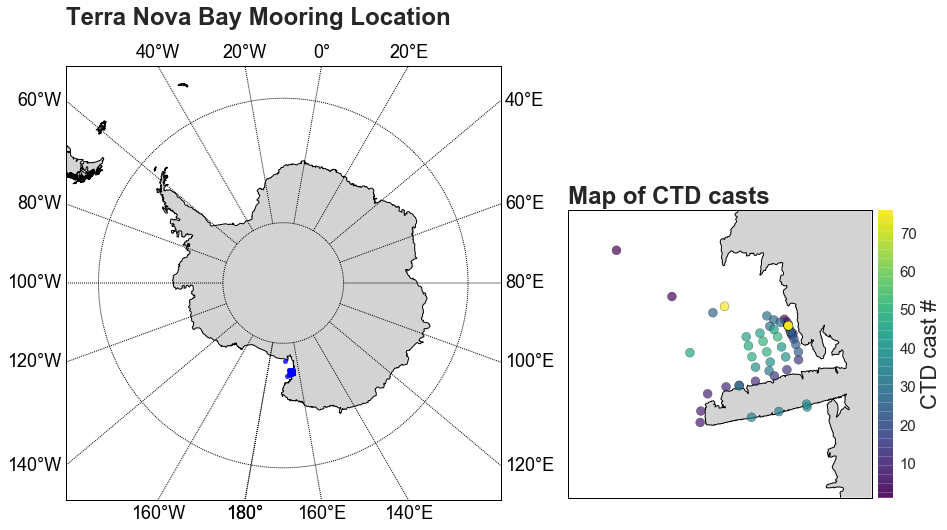

In [180]:
sns.set(font_scale=1.5)
fig = plt.figure(num=None, figsize=(12,8))
ax = plt.axes()
m = Basemap(projection='spstere',boundinglat=-55,lon_0=170, resolution='l')
m.drawmapboundary(fill_color='white')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.),labels=[])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True, True, True, True])
m.fillcontinents(color='lightgrey', lake_color='white')
x,y = m(lons, lats)
m.plot(x,y,'bo',markersize=5,alpha=0.8)
plt.title('Terra Nova Bay Mooring Location',fontweight='bold',loc='left',FontSize=24,y=1.08)
ax2 = plt.axes([.78, .13, .5, .5])
m2 = Basemap(projection='merc',llcrnrlon=169,urcrnrlon=162, llcrnrlat=-76, urcrnrlat=-74.3, resolution='h')
m2.drawmapboundary(fill_color='white')
m2.drawcoastlines()
m2.drawparallels(np.arange(-80.,81.,20.))
m2.drawmeridians(np.arange(-180.,181.,20.))
m2.fillcontinents(color='lightgrey', lake_color='white')
x,y = m2(lons, lats)
colors = np.linspace(1,76,76)
sns.set(font_scale=1.5)
m2.scatter(x,y,c=colors,cmap='viridis',s=80,alpha=0.7,zorder=10,edgecolor='k')
cbar = m2.colorbar()
cbar.set_label('CTD cast #',FontSize=22)
plt.title('Map of CTD casts',fontweight='bold',loc='left',FontSize=24)
plt.show()

# Pressure-Temperature profiles

Imported pylab to generate a set of 76 colours derived from an existing colormap to cycle through for each CTD cast

In [254]:
import pylab
number_colours = 76
cm = pylab.get_cmap('RdYlBu_r')
color=[(cm(1.*i/number_colours)) for i in range(number_colours)]

### Plot temperature against depth for all casts

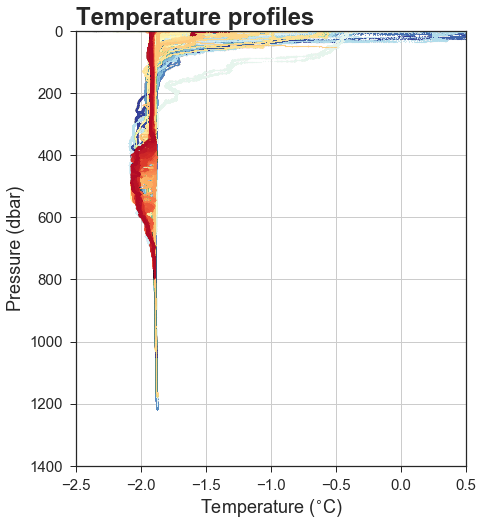

In [182]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
fig = plt.figure(figsize=(7,8))
ax=plt.gca()
for key in ctd:
    plt.scatter(ctd[key]['TEMP'], ctd[key]['DEPTH'], c=color[list(ctd.keys()).index(key)],cmap='RdYlBu_r', s=0.5, alpha=0.8)
ax.set_ylim([1400, 0])
ax.set_xlim([-2.5, 0.5])
ax.set_ylabel('Pressure (dbar)',FontSize=18)
ax.set_xlabel('Temperature ($^{\circ}$C)', FontSize=18)
ax.set_title('Temperature profiles',loc='left',fontweight='bold',FontSize=24)
ax.grid()

# Temperature-Salinity profiles

### Plot temperature against salinity for all casts

> For loops are used to loop through all 76 casts, and each time, a different color is used when plotting

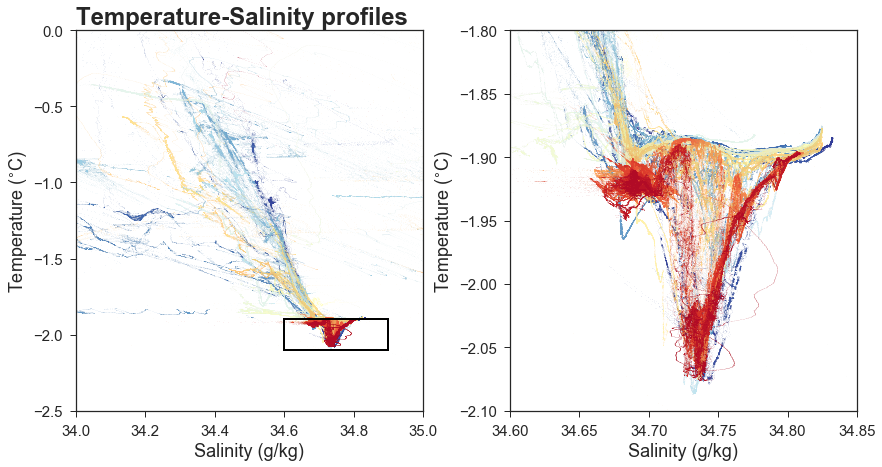

In [255]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
fig, axes = plt.subplots(figsize=(14,7), nrows = 1, ncols = 2)
for key in ctd:
    axes[0].scatter(ctd[key]['PSAL2'], ctd[key]['TEMP2'], c=color[list(ctd.keys()).index(key)],cmap='RdYlBu_r', s=0.005, alpha=0.8)
    axes[1].scatter(ctd[key]['PSAL2'], ctd[key]['TEMP2'], c=color[list(ctd.keys()).index(key)],cmap='RdYlBu_r', s=0.005, alpha=0.8)
axes[0].set_ylim([-2.5, 0])
axes[0].set_xlim([34, 35])
axes[0].set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
axes[0].set_xlabel('Salinity (g/kg)', FontSize=18)
axes[0].set_title('Temperature-Salinity profiles',loc='left',fontweight='bold',FontSize=24)    
axes[1].set_ylim([-2.1, -1.8])
axes[1].set_xlim([34.6, 34.85])
axes[1].set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
axes[1].set_xlabel('Salinity (g/kg)', FontSize=18)
import matplotlib.patches as patches
rect = patches.Rectangle((34.6,-2.1),0.3,0.2,linewidth=2,edgecolor='k',facecolor='none')
axes[0].add_patch(rect)
fig.subplots_adjust(wspace=.25)
ax.grid()

### Calculate mean surface temperatures and salinity

The "surface" was arbitrarily chosen to be the upper 10 metres

In [259]:
# surface layer means
ind= [ctd[key][ctd[key]['DEPTH'] <= 10].index for key in ctd]
depth_surf = [ctd[key][ctd[key]['DEPTH'] <= 10]['DEPTH'] for key in ctd]
temp_surf = [ctd[key][ctd[key]['DEPTH'] <= 10]['TEMP'] for key in ctd]
psal_surf = [ctd[key][ctd[key]['DEPTH'] <= 10]['PSAL'] for key in ctd]
    
d_means = pd.DataFrame()
d_means['ind'] = [ind[i] for i in range(0,76)]
d_means['depth_surf'] = [depth_surf[i].mean() for i in range(0,76)]
d_means['temp_surf'] = [temp_surf[i].mean() for i in range(0,76)]
d_means['psal_surf'] = [psal_surf[i].mean() for i in range(0,76)]

Calculate the means for deeper layers

In [185]:
# other layers
for i in range(0,20,1):
    ind= [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))].index for key in ctd]
    depth_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))] for key in ctd]
    temp_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))]['TEMP'] for key in ctd]
    psal_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))]['PSAL'] for key in ctd]
    
    d_means['ind_'+str(70 + i*50)] = [ind[i] for i in range(0,76)]
    d_means['depth_'+str(70 + i*50)] = [depth_layer[i].mean() for i in range(0,76)]
    d_means['temp_'+str(70 + i*50)] = [temp_layer[i].mean() for i in range(0,76)]
    d_means['psal_'+str(70 + i*50)] = [psal_layer[i].mean() for i in range(0,76)]

In [272]:
# imported to linearly interpolate data between CTD sites
import scipy
from numpy import meshgrid
from scipy.interpolate import griddata

In [261]:
# # Mean temperatures in different layers - not sure what I was trying to achieve here
# fig, axes = plt.subplots(figsize=(16,16),nrows=3,ncols=3, sharex='all', sharey='all')
# x = [ctd[key]['LONGITUDE'].mean() for key in ctd]
# y = [ctd[key]['LATITUDE'].mean() for key in ctd]
# axes[0,0].set_title('Mean surface temperature',fontweight='bold',loc='left',FontSize=24)
# z = d_means['temp_surf'].values
# for i in range(0,3):
#     for j in range(0,3):
#         m3 = Basemap(ax=axes[i,j],projection='merc',llcrnrlon=163,urcrnrlon=167, llcrnrlat=-75.6, urcrnrlat=-74.8, resolution='h')
#         m3.drawmapboundary(fill_color='white')
#         m3.drawcoastlines()
#         m3.drawparallels(np.arange(-80.,81.,20.))
#         m3.drawmeridians(np.arange(-180.,181.,20.))
#         m3.fillcontinents(color='lightgrey', lake_color='white')
#         xm,ym = m3(x, y)
#         axes[i,j].plot(xm,ym,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
#         # interpolate scatter to regular grid
#         numIndexes = 50 # set resolution for mesh
#         xi = np.linspace(np.min(x), np.max(x),numIndexes)
#         yi = np.linspace(np.min(y), np.max(y),numIndexes)
#         xi,yi = meshgrid(xi, yi)
#         zi = griddata((x, y), z,(xi, yi),method='linear')
#         xmi,ymi = m3(xi,yi)
#         contour = m3.contourf(xmi,ymi,zi,cmap='Blues_r',vmin=-2.1,vmax=1.4)
#         lines = m3.contour(xmi,ymi,zi,cmap='Blues_r',vmin=-2.1,vmax=1.4,zorder=1)
#         z = d_means['temp_'+str(70 + i*50)].values
#         cbar = m3.colorbar(contour)
#         cbar.set_label('Temperature (C)',FontSize=18)
# plt.tight_layout()

## Calculate mixed layer depths

Density-threshold method was used to calculate MLD

> Used TEOS-10 to calculate **absolute salinity**, **potential density** and the **potential density anomaly** at a surface reference pressure. This also requires the practical salinity, presure, temperature and lon-lat coordinates.

> Mixed layer base is when the change in potential density from the reference potential density is 0.2 kg/m^3

** Use TEOS-10 to also find the freezing point, given salinity, pressure and saturation fraction**

In [262]:
mld = []
freeze=[]
for key in ctd:
    SP = ctd[key]['PSAL2'].values
    p = ctd[key]['PRES'].values
    lon = ctd[key]['LONGITUDE'].unique()
    lat = ctd[key]['LATITUDE'].unique()
    SA = gsw.SA_from_SP(SP,p,lon,lat)
    t = ctd[key]['TEMP'].values

    # potential densities calculated from TEOS-10 equations
    ctd[key]['pot_rho'] = pd.Series(gsw.pot_rho_t_exact(SA,t,p,p_ref=0))
    ctd[key]['sigma_t'] = pd.Series(ctd[key]['pot_rho'] - 1000)

    # reference potential density at 10-20m depth average
    reference = ctd[key][(ctd[key]['DEPTH']>10) & (ctd[key]['DEPTH']<20)].mean()
    SP_ref = reference['PSAL']
    pres_ref = reference['PRES']
    t_ref = reference['TEMP']
    SA_ref = gsw.SA_from_SP(SP_ref,pres_ref,lon,lat)
    pot_rho_ref = gsw.pot_rho_t_exact(SA_ref,t_ref,pres_ref,p_ref=0)
    sigma_t_ref = pot_rho_ref - 1000
    mld_sigma = sigma_t_ref + 0.2
    # find nearest index where the mld criteria is met
    match_ind = ctd[key]['sigma_t'].index[(ctd[key]['sigma_t']-mld_sigma).abs().argsort()[0]]
    # Therefore ,the mixed layer depth (mld)
    mld.append(ctd[key]['DEPTH'][match_ind])
    sat_frac = reference['oxigen_ml_L']/1000
    freeze.append(gsw.t_freezing(SA_ref,pres_ref,sat_frac))

### Calculate the surface freezing point

In [263]:
# calculate surface freezing point
freeze_mean = sum(freeze)/len(freeze)
count=0
for i in range(0,len(freeze)):
    diff = (freeze[i] - freeze_mean)
    tolerance = np.std(freeze)
    if diff > tolerance*0.05:
        freeze[i] = 0
        count+=1
freeze_mean = sum(freeze)/( len(freeze) - count)
freeze_mean

array([-1.89613136])

### Show the surface freezing point on a T-S diagram

Text(34.7,-1.85,'Surface freezing point')

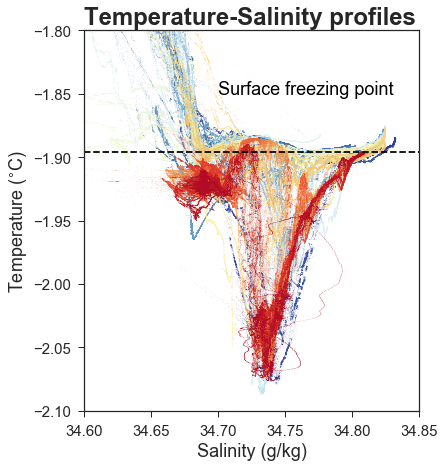

In [264]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
fig= plt.figure(figsize=(6,7))
for key in ctd:
    plt.scatter(ctd[key]['PSAL2'], ctd[key]['TEMP2'], c=color[list(ctd.keys()).index(key)],cmap='RdYlBu_r', s=0.005, alpha=0.8)
plt.title('Temperature-Salinity profiles',loc='left',fontweight='bold',FontSize=24)    
plt.ylim([-2.1, -1.8])
plt.xlim([34.6, 34.85])
plt.ylabel('Temperature ($^{\circ}$C)',FontSize=18)
plt.xlabel('Salinity (g/kg)', FontSize=18)
plt.plot([34.6,34.85],[freeze_mean, freeze_mean],color='k',linestyle='--')
plt.text(34.7,-1.85,'Surface freezing point',color='k')

> The water mass below this surface-freezing point implies 'super-cooled' water, as a result of surface cooling, and sea-ice formation in the polynya. The formation of sea-ice adds brine to the water, hence the high salinity.

> This water mass is High Salinity Shelf Water

### Plot a histogram of the calculated mixed layer depths

Text(0.5,0,'Mixed Layer Depths (m)')

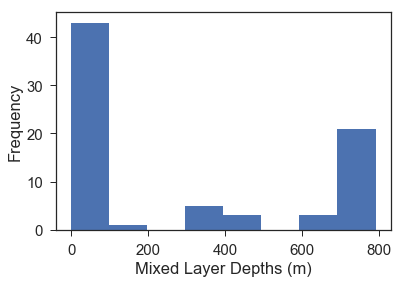

In [265]:
mld = pd.Series(mld,name='MLD')
mld.plot(kind='hist',bins =8)
plt.xlabel('Mixed Layer Depths (m)')

> It makes sense to have a lot of shallow mixed layer depths, because these measurements were taken in February 2017, which is late Summer in the Southern hemisphere.

> There is typically less turbulent mixing in the Summer, as the solar heating provides a more stable $\rho$ stratification, reducing the penetration of wind-driven turbulence.

Create a new dataframe for the mixed layer depth information

In [266]:
mld = pd.concat([mld,pd.Series(lons, name='lons'),pd.Series(lats, name='lats')],axis=1);

### Plot of the calculated mixed layer depths

Can see that it is mostly shallow (less than 100m)

Text(0.5,1,'Mixed Layer Depths')

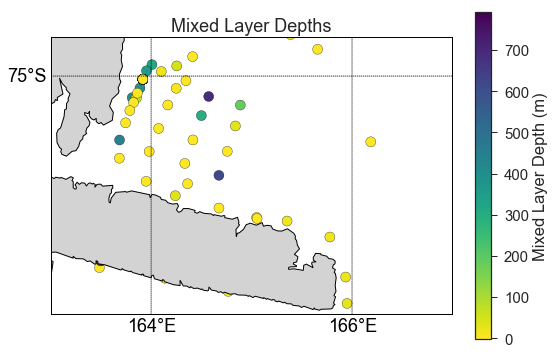

In [267]:
fig = plt.figure(figsize=(8,6))
m7 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=167, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m7.drawmapboundary(fill_color='white')
m7.drawcoastlines()
m7.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m7.drawmeridians(np.arange(-180.,181.,2.),labels=[False,False,False,True])
m7.fillcontinents(color='lightgrey', lake_color='white')
x,y = m7(mld['lons'].values, mld['lats'].values)
plt.scatter(x,y,c=mld['MLD'].values,cmap='viridis_r',alpha=1.,s=100,edgecolor='k')
cbar = plt.colorbar(fraction=0.05)
cbar.set_label('Mixed Layer Depth (m)')
plt.title('Mixed Layer Depths')

In [268]:
mld['temp_surf'] = d_means['temp_surf']

In [275]:
mld['psal_surf'] = d_means['psal_surf']

### Plot histograms of surface temperatures and salinities
Can see the supercooled water dominates here, indicating HSSW

Text(0.5,0,'Surface Temperature (C)')

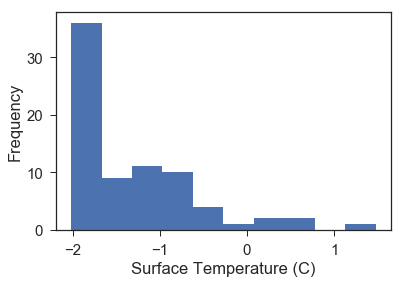

In [287]:
mld['temp_surf'].plot(kind='hist')
plt.xlabel('Surface Temperature (C)')


Text(0.5,0,'Surface Salinity (g/kg)')

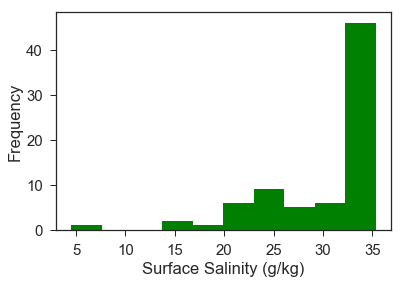

In [289]:
mld['psal_surf'].plot(kind='hist',color='g')
plt.xlabel('Surface Salinity (g/kg)')

Text(0.5,1,'Surface temperatures')

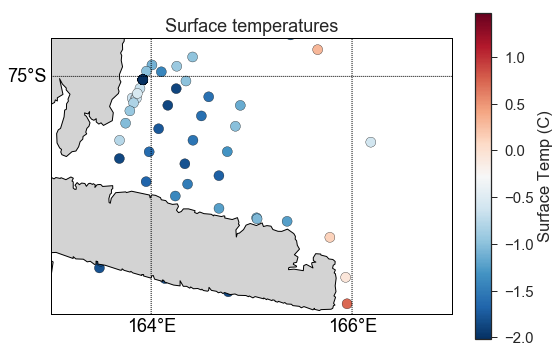

In [270]:
fig = plt.figure(figsize=(8,6))
m7 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=167, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m7.drawmapboundary(fill_color='white')
m7.drawcoastlines()
m7.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m7.drawmeridians(np.arange(-180.,181.,2.),labels=[False,False,False,True])
m7.fillcontinents(color='lightgrey', lake_color='white')
x,y = m7(mld['lons'].values, mld['lats'].values)
plt.scatter(x,y,c=mld['temp_surf'].values,cmap='RdBu_r',alpha=1,s=100,edgecolor='k')
cbar = plt.colorbar(fraction=0.05)
cbar.set_label('Surface Temp (C)')
plt.title('Surface temperatures')

### Linearly interpolate the surface temperatures

Text(0,1,'Interpolated surface temperatures')

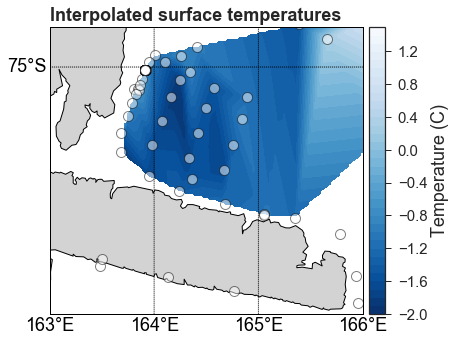

In [294]:
# ignore data away from main bay area! - so latitudes below -75.4 and above 74.8
mld_bay = mld[(mld['lats']>=-75.4) & (mld['lats']<=-74.8)]
lons_bay = mld_bay['lons'].values
lats_bay= mld_bay['lats'].values
fig = plt.figure(figsize=(6,7))
z = mld_bay['temp_surf'].values
m6 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m6.drawmapboundary(fill_color='white')
m6.drawcoastlines()
m6.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m6.drawmeridians(np.arange(-180.,181.,1.),labels=[False,False,False,True])
m6.fillcontinents(color='lightgrey', lake_color='white')
x,y = m6(lons, lats)
plt.plot(x,y,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
# interpolate scatter to regular grid
numIndexes = 100 # set resolution for mesh
xi = np.linspace(np.min(lons_bay), np.max(lons_bay),numIndexes)
yi = np.linspace(np.min(lats_bay), np.max(lats_bay),numIndexes)
xi,yi = meshgrid(xi, yi)
zi = griddata((lons_bay, lats_bay), z,(xi, yi),method='linear')
xmi,ymi = m6(xi,yi)
contour = m6.contourf(xmi,ymi,zi,cmap='Blues_r',levels=np.linspace(-2,1.5,36))
cbar = m6.colorbar(contour)
cbar.set_label('Temperature (C)',FontSize=18)
plt.title('Interpolated surface temperatures',loc='left',FontSize=18, fontweight='bold')

### Linearly interpolate the mixed layer depths

Text(0,1,'Mixed Layer Depths, February')

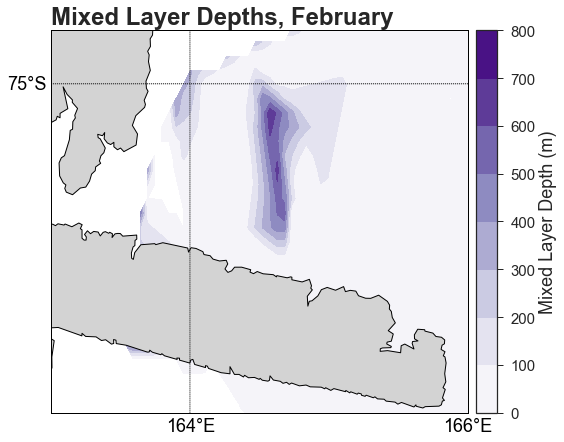

In [295]:
fig = plt.figure(figsize=(8,8))
z = mld['MLD'].values
m4 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m4.drawmapboundary(fill_color='white')
m4.drawcoastlines()
m4.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m4.drawmeridians(np.arange(-180.,181.,2.),labels=[False,False,False,True])
m4.fillcontinents(color='lightgrey', lake_color='white')
x,y = m4(lons, lats)
# plt.plot(x,y,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
# interpolate scatter to regular grid
numIndexes = 100 # set resolution for mesh
xi = np.linspace(np.min(lons), np.max(lons),numIndexes)
yi = np.linspace(np.min(lats), np.max(lats),numIndexes)
xi,yi = meshgrid(xi, yi)
zi = griddata((lons, lats), z,(xi, yi),method='linear')
xmi,ymi = m4(xi,yi)
contour = m4.contourf(xmi,ymi,zi,cmap='Purples',levels=np.linspace(0,800,9))
cbar = m4.colorbar(contour)
cbar.set_label('Mixed Layer Depth (m)',FontSize=18)
plt.title('Mixed Layer Depths, February',loc='left',FontSize=24, fontweight='bold')

# Conclusion

TEOS-10 functions found that the majority of sites had mixed layer depths less than 100m, which agrees with expectations of shallow depths in the Southern Summer. However, the values from TEOS-10 had a large range of depths.



# ---END OF PROJECT --#
Below is further analysis of the 2017 data set

# Chlorophyll $\alpha$ Depth

#### Look at the fluorescence data for each cast

Text(0.5,0,'Chlorophyll α Fluorescence')

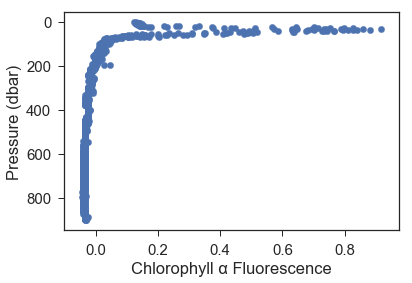

In [199]:
key='cast_1'
plt.scatter(ctd[key]['flECO-AFL'],ctd[key]['DEPTH'],s=40)
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Chlorophyll α Fluorescence')

### Find the depths at which fluorescence is at a maximum

This is often used to define the base of the mixed layer

In [301]:
Zα_2017 = []
fmax_list=[]
for key in ctd:
    fmax = ctd[key]['flECO-AFL'].max()
    fmax_list.append(fmax)
    Zα_2017.append(ctd[key][ctd[key]['flECO-AFL'] == fmax].DEPTH.values)
mld['Zα_2017'] = pd.Series(Zα_2017)

In [302]:
for i in range(0,76):
    mld['Zα_2017'][i] = mld['Zα_2017'][i].mean()

### Add to the mixed layer depth data frame, the fluoresence maximums

In [297]:
mld['fluor_max'] = fmax_list

Text(0.5,0,'Longitude')

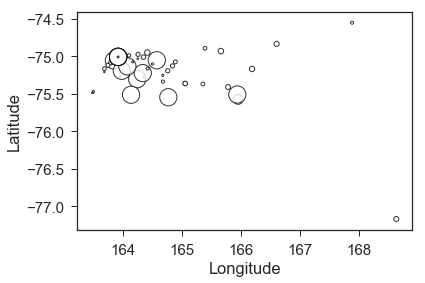

In [308]:
plt.scatter(mld['lons'],mld['lats'],mld['fluor_max']*10,alpha=0.8,color='w',edgecolor='k',linewidth=1)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

### Plot histogram of Mixed Layer Depths based on maximum Chlorophyll $\alpha$ fluorscence

Text(0.5,0,'Depths of Chl α maximums (m)')

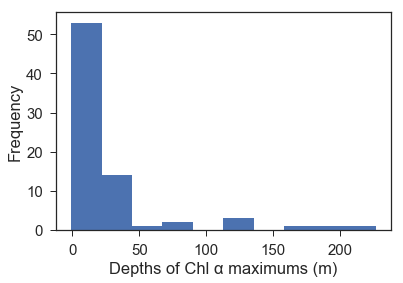

In [306]:
mld['Zα_2017'].plot(kind='hist')
plt.xlabel('Depths of Chl α maximums (m)')

> Agrees with the shallow mixed layer depths calculated earler using TEOS-10, however, these are also much smaller values!!

## Other plots

Text(0,1,'MLD and Chl α Concentrations')

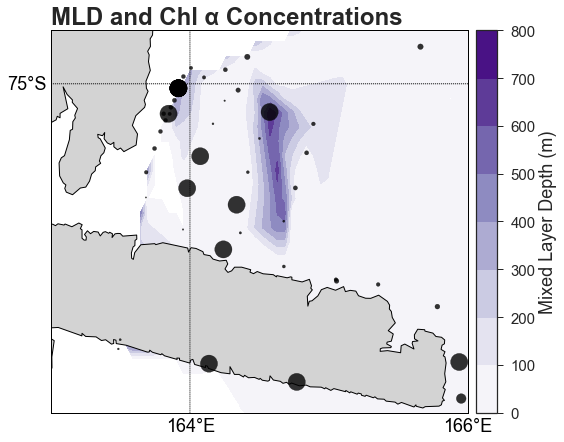

In [311]:
fig = plt.figure(figsize=(8,8))
z = mld['MLD'].values
m4 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m4.drawmapboundary(fill_color='white')
m4.drawcoastlines()
m4.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m4.drawmeridians(np.arange(-180.,181.,2.),labels=[False,False,False,True])
m4.fillcontinents(color='lightgrey', lake_color='white')
x,y = m4(lons,lats)
plt.scatter(x,y,mld['fluor_max']*10,alpha=0.8,color='k',edgecolor='k',zorder=100)
# interpolate scatter to regular grid
numIndexes = 100 # set resolution for mesh
xi = np.linspace(np.min(lons), np.max(lons),numIndexes)
yi = np.linspace(np.min(lats), np.max(lats),numIndexes)
xi,yi = meshgrid(xi, yi)
zi = griddata((lons, lats), z,(xi, yi),method='linear')
xmi,ymi = m4(xi,yi)
contour = m4.contourf(xmi,ymi,zi,cmap='Purples',levels=np.linspace(0,800,9))
cbar = m4.colorbar(contour)
cbar.set_label('Mixed Layer Depth (m)',FontSize=18)
plt.title('MLD and Chl α Concentrations',loc='left',FontSize=24, fontweight='bold')
